In [104]:
import pandas as pd

In [105]:
# read in data
df = pd.read_csv('ViewingActivity-sample.csv')

In [106]:
# look at some inputs
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [107]:
# drop first column
df = df.drop('Profile Name',axis=1)

In [108]:
df.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [109]:
# drop unncessary columns
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [110]:
# check first input
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [111]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [112]:
# change Start Time to datetime and UTC
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to Pacific time
df.index = df.index.tz_convert('US/Pacific')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2013-03-19 22:17:53-07:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [113]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Pacific]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [114]:
# Add keywords for shows
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
star_trek = df[df['Title'].str.contains('Star Trek', regex=False)]
archer = df[df['Title'].str.contains('Archer', regex=False)]
office.shape

(137, 3)

In [115]:
# Time watching the office
office['Duration'].sum()

Timedelta('1 days 15:00:39')

In [116]:
# The most watched episode/movie
df['Title'].value_counts().idxmax()

'The Office (U.S.): Season 3: Grief Counseling (Episode 4)'

In [117]:
# make columns for hour and weekday watched
office['hour'] = office['Start Time'].dt.hour
office['weekday'] = office['Start Time'].dt.weekday


/var/folders/27/2b3zx2s95ml7sb897k250yhr0000gn/T/ipykernel_18342/604633404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = office['Start Time'].dt.hour
/var/folders/27/2b3zx2s95ml7sb897k250yhr0000gn/T/ipykernel_18342/604633404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday


In [118]:
# to view chart
import matplotlib

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

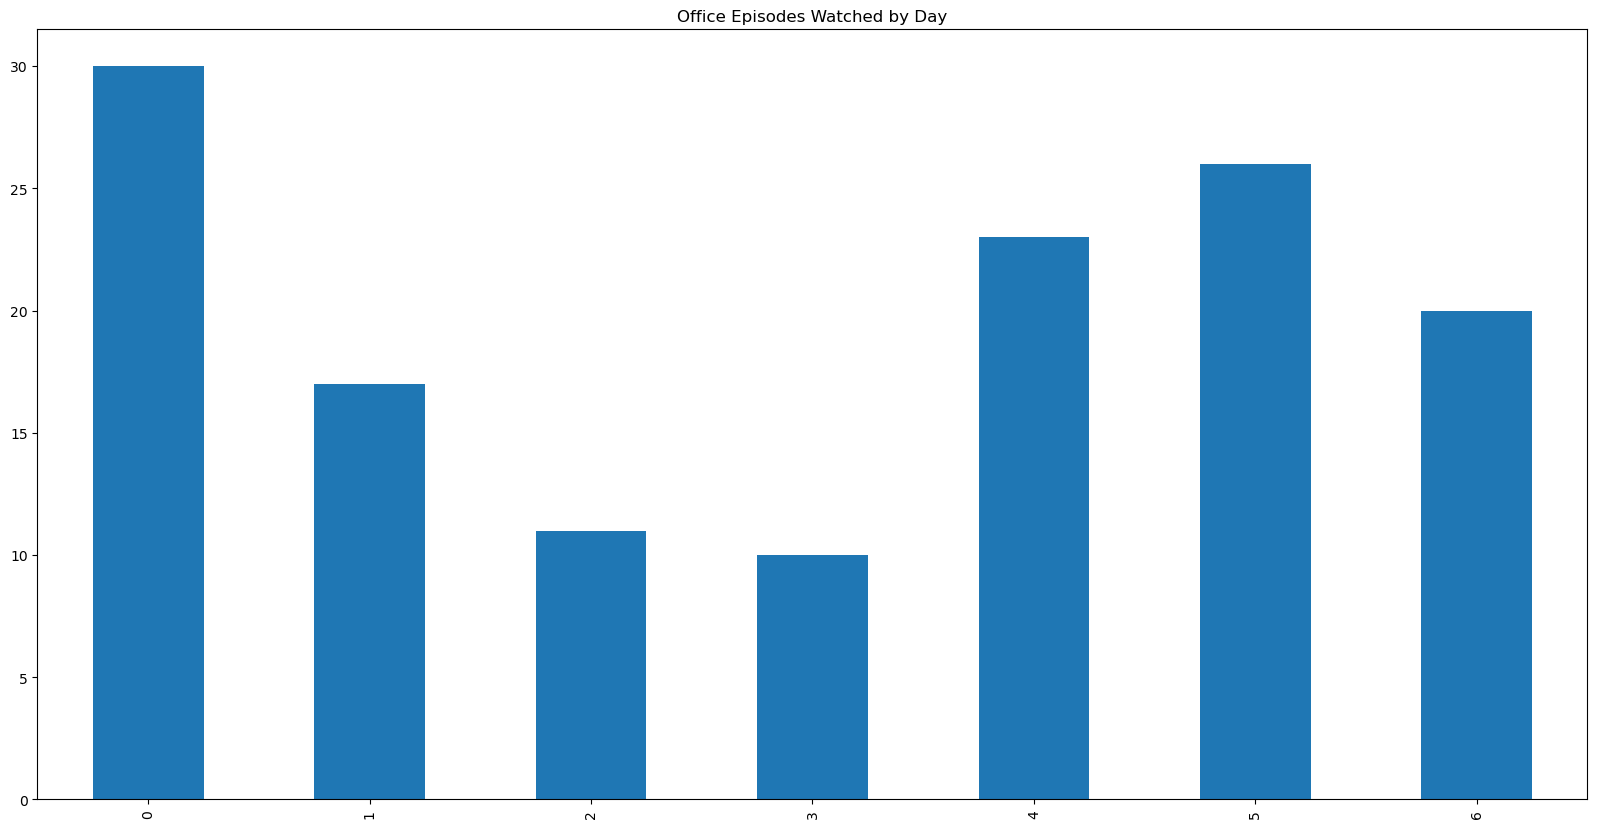

In [119]:
office['weekday'].value_counts().sort_index().plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

/var/folders/27/2b3zx2s95ml7sb897k250yhr0000gn/T/ipykernel_18342/256903976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = pd.Categorical(office['hour'], ordered=True)


<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

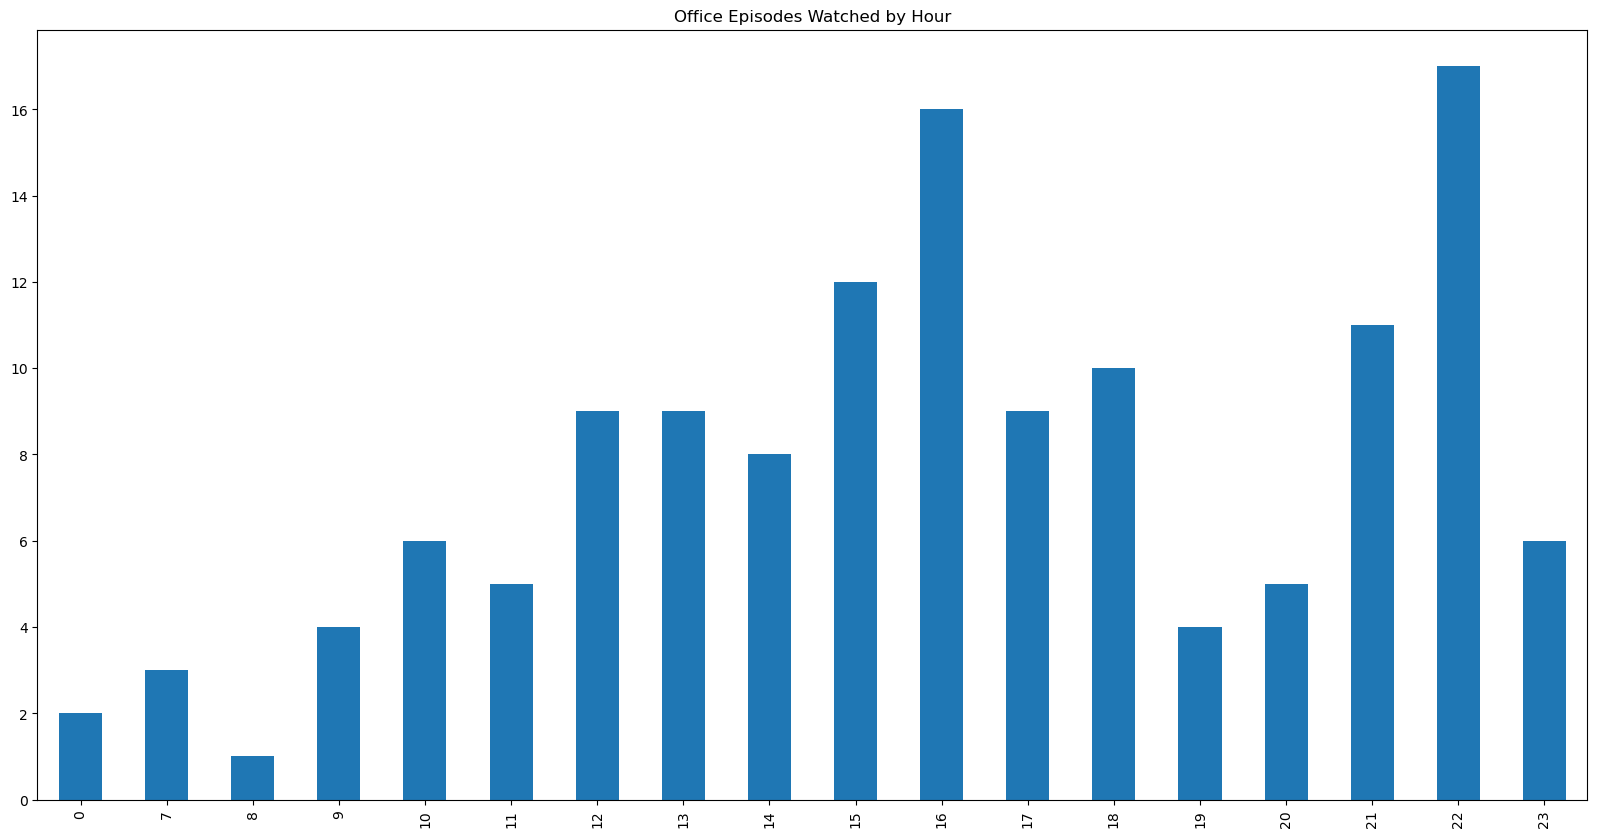

In [120]:
office['hour'] = pd.Categorical(office['hour'], ordered=True)
office_by_hour = office['hour'].value_counts().sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')